# Загрузка датасета Omniglot и определение вспомогательных функций

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive
import numpy as np
import os

drive.mount('/content/drive')

PATH = 'drive/My Drive/Few-Shot-Learning/Omniglot-data-set'

RANDOM_STATE = 17

X_train = np.loadtxt(os.path.join(PATH, 'train_images.txt'), dtype=np.uint8)
y_train = np.loadtxt(os.path.join(PATH, 'train_labels.txt'), dtype='str')

X_train = np.resize(X_train, (X_train.shape[0] // 210, 105 * 105))
y_train = np.resize(y_train, (y_train.shape[0] // 2))

X_test = np.loadtxt(os.path.join(PATH, 'test_images.txt'), dtype=np.uint8)
y_test = np.loadtxt(os.path.join(PATH, 'test_labels.txt'), dtype='str')

X_test = np.resize(X_test, (X_test.shape[0] // 210, 105 * 105))
y_test = np.resize(y_test, (y_test.shape[0] // 2))

def metrics(y_test, y_pred):
  print('confusion matrix:')
  print(confusion_matrix(y_test, y_pred))

  print(classification_report(y_test, y_pred, digits=3))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Визуализация датасета Omniglot

label: Japanese_(hiragana)_38


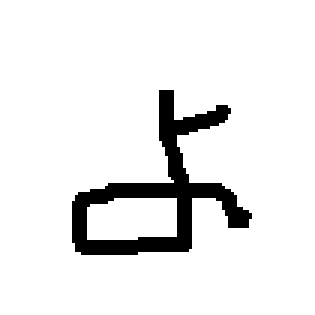

In [4]:
from PIL import Image

digit_number = -1

image = Image.fromarray(X_train.reshape((-1, 105, 105))[digit_number], mode='P')

print('label: {}'.format(y_train[digit_number]))
display(image.resize((315, 315)))

# Использование дерева решений для решения задачи классификации рукописных символов

Импорты

In [5]:
from sklearn.tree import DecisionTreeClassifier

Обучение дерева решений

In [6]:
tree = DecisionTreeClassifier(max_depth=20, random_state=RANDOM_STATE)

tree.fit(X_train, y_train)

y_tree_pred = tree.predict(X_test)

Вычисление метрик для оценки качества работы дерева решений

In [7]:
metrics(y_test, y_tree_pred) #не уверен что это вообще стоит выводить

confusion matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                              precision    recall  f1-score   support

                     Alphabet_of_the_Magi_01      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_02      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_03      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_04      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_05      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_06      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_07      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_08      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_09      0.000     0.000     0.000         6
 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Использование метода ближайших соседей для решения задачи классификации рукописных символов

Импорты

In [14]:
from sklearn.neighbors import KNeighborsClassifier

Обучение модели на методе ближайших соседей

In [15]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

y_knn_pred = knn.predict(X_test)

Вычисление метрик для оценки качества работы метода ближайших соседей

In [16]:
metrics(y_test, y_knn_pred)

confusion matrix:
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                              precision    recall  f1-score   support

                     Alphabet_of_the_Magi_01      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_02      1.000     0.167     0.286         6
                     Alphabet_of_the_Magi_03      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_04      0.012     0.500     0.023         6
                     Alphabet_of_the_Magi_05      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_06      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_07      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_08      0.333     0.167     0.222         6
                     Alphabet_of_the_Magi_09      0.000     0.000     0.000         6
 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Использование логистической регрессии для решения задачи классификации рукописных символов

Импорты

In [11]:
from sklearn.linear_model import LogisticRegression

Обучение модели логистической регрессии

In [12]:
logit = LogisticRegression(n_jobs=-1, random_state=RANDOM_STATE)

logit.fit(X_train, y_train)

y_logit_pred = logit.predict(X_test)

Вычисление метрик для оценки качества работы логистической регрессии

In [13]:
metrics(y_test, y_logit_pred)

confusion matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                              precision    recall  f1-score   support

                     Alphabet_of_the_Magi_01      0.500     0.167     0.250         6
                     Alphabet_of_the_Magi_02      0.250     0.167     0.200         6
                     Alphabet_of_the_Magi_03      0.250     0.167     0.200         6
                     Alphabet_of_the_Magi_04      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_05      1.000     0.167     0.286         6
                     Alphabet_of_the_Magi_06      0.286     0.333     0.308         6
                     Alphabet_of_the_Magi_07      0.200     0.333     0.250         6
                     Alphabet_of_the_Magi_08      0.600     0.500     0.545         6
                     Alphabet_of_the_Magi_09      0.333     0.167     0.222         6
 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Использование случайного леса для решения задачи классификации рукописных символов

Импорты

In [8]:
from sklearn.ensemble import RandomForestClassifier

Обучение случайного леса

In [9]:
rf = RandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE)

rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)

Вычисление метрик для оценки качества работы случайного леса

In [10]:
metrics(y_test, y_rf_pred)

confusion matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                              precision    recall  f1-score   support

                     Alphabet_of_the_Magi_01      0.071     0.167     0.100         6
                     Alphabet_of_the_Magi_02      0.050     0.167     0.077         6
                     Alphabet_of_the_Magi_03      0.000     0.000     0.000         6
                     Alphabet_of_the_Magi_04      0.143     0.833     0.244         6
                     Alphabet_of_the_Magi_05      0.038     0.167     0.062         6
                     Alphabet_of_the_Magi_06      0.200     0.333     0.250         6
                     Alphabet_of_the_Magi_07      0.111     0.167     0.133         6
                     Alphabet_of_the_Magi_08      0.222     0.333     0.267         6
                     Alphabet_of_the_Magi_09      0.400     0.333     0.364         6
 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Сравнение четырех методов для датасета Omniglot

Результаты работы

In [17]:
from sklearn.metrics import accuracy_score

print('DecisionTree accuracy      : {}'.format(accuracy_score(y_test, y_tree_pred)))
print('Knn accuracy               : {}'.format(accuracy_score(y_test, y_knn_pred)))
print('LogisticRegression accuracy: {}'.format(accuracy_score(y_test, y_logit_pred)))
print('RandomForest accuracy      : {}'.format(accuracy_score(y_test, y_rf_pred)))

DecisionTree accuracy      : 0.023208050934483467
Knn accuracy               : 0.0751694393099199
LogisticRegression accuracy: 0.23865270075990963
RandomForest accuracy      : 0.15157116451016636


В данной задаче классификации в разы увеличилось количество классов, а количество объектов каждого класса в обучающей выборке наоборот стало в разы меньше. Если данные 4 метода для решения задачи классификации рукописных цифр давали accuracy в пределах 89-97%, то тут ситуация с данной метрикой намного хуже (2-24%), что говорит о слабой применимости классических методов для решения подобного рода задач (много классов и мало объектов каждого класса). Следует отметить, что несмотря на относительно низкие значения accuracy, этот параметр все равно на порядки выше простого случайного угадывания и довольно сильно отличается у данных 4 методов (некторые приспособлены лучше, некоторые хуже). Также использовалась лишь половина всей выборки из-за предела на ОЗУ (иначе некоторые методы переходили через этот предел и программа аварийно завершала работу) 